In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as logit
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as gb
from sklearn.linear_model import Lasso as lasso
from sklearn.linear_model import RidgeClassifier as ridge
from sklearn.ensemble import AdaBoostClassifier as adaboost
from sklearn.neural_network import MLPClassifier as nn
from sklearn.tree import DecisionTreeClassifier as dectree


In [3]:
%matplotlib inline

In [4]:
NUM_POINTS = 10000

In [5]:
df = pd.DataFrame({'x': np.random.normal(0,1,NUM_POINTS), 'y': np.random.normal(0,1,NUM_POINTS)})

In [6]:
df.head()

,x,y
0,0.067524,-1.383932
1,-0.004129,1.664772
2,-0.915489,-0.185817
3,0.093412,-0.742546
4,0.946916,2.194841


In [7]:
plt.style.use('default')

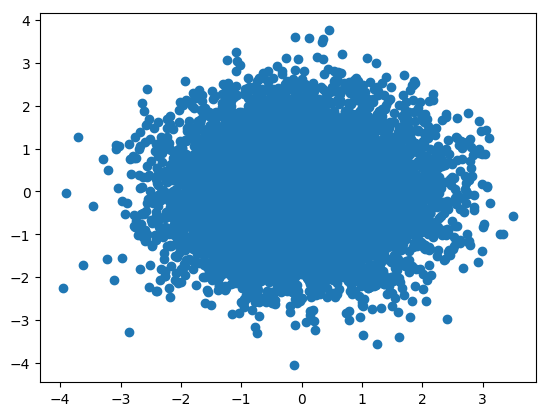

In [8]:
plt.scatter(df.x, df.y)

In [9]:
df['circle'] = [(1 if (((x-1)*(x-1) + (y-1)*(y-1)) < 0.16) else 0) for x, y in zip(df['x'], df['y'])]

In [10]:
df['multiCircle'] = [(1 if (((abs(x)-1)*(abs(x)-1) + (abs(y)-1)*(abs(y)-1)) < 0.09) else 0) for x, y in zip(df['x'], df['y'])]

In [11]:
df['square'] = [(1 if ((x>0.6) & (x < 1.4) & (y>-1.4) & (y<-0.6)) else 0) for x, y in zip(df['x'], df['y'])]

In [12]:
df['triangle'] = [(1 if ((x>1) & (y<1.5) & ((y-x)>-1)) else 0) for x, y in zip(df['x'], df['y'])]

In [13]:
df['parabola'] = [(1 if (y > ((x-1)*(x-1))) else 0) for x, y in zip(df['x'], df['y'])]

In [14]:
df['hyperbola'] = [(1 if ((x-.4)*(y-0.5) > 0.8) else 0) for x, y in zip(df['x'], df['y'])]

In [15]:
df.head()


,x,y,circle,multiCircle,square,triangle,parabola,hyperbola
0,0.067524,-1.383932,0,0,0,0,0,0
1,-0.004129,1.664772,0,0,0,0,1,0
2,-0.915489,-0.185817,0,0,0,0,0,1
3,0.093412,-0.742546,0,0,0,0,0,0
4,0.946916,2.194841,0,0,0,0,1,1


In [16]:
X = df.as_matrix(columns=['x', 'y'])

In [17]:
models = [SVC(kernel='linear'), SVC(kernel='rbf'), logit(), nb(), RF(), gb(), lasso(), ridge(), 
          adaboost(),  nn(), dectree()]
modelNames = ['SVM Linear', 'SVM RBF', 'Logistic Regression', 'Naive Bayesian', 'Random Forest', 'Gradient Boosting', 
              'Lasso', 'Ridge', 'Ada Boost', 'Neural Network', 'Decision Tree']

/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


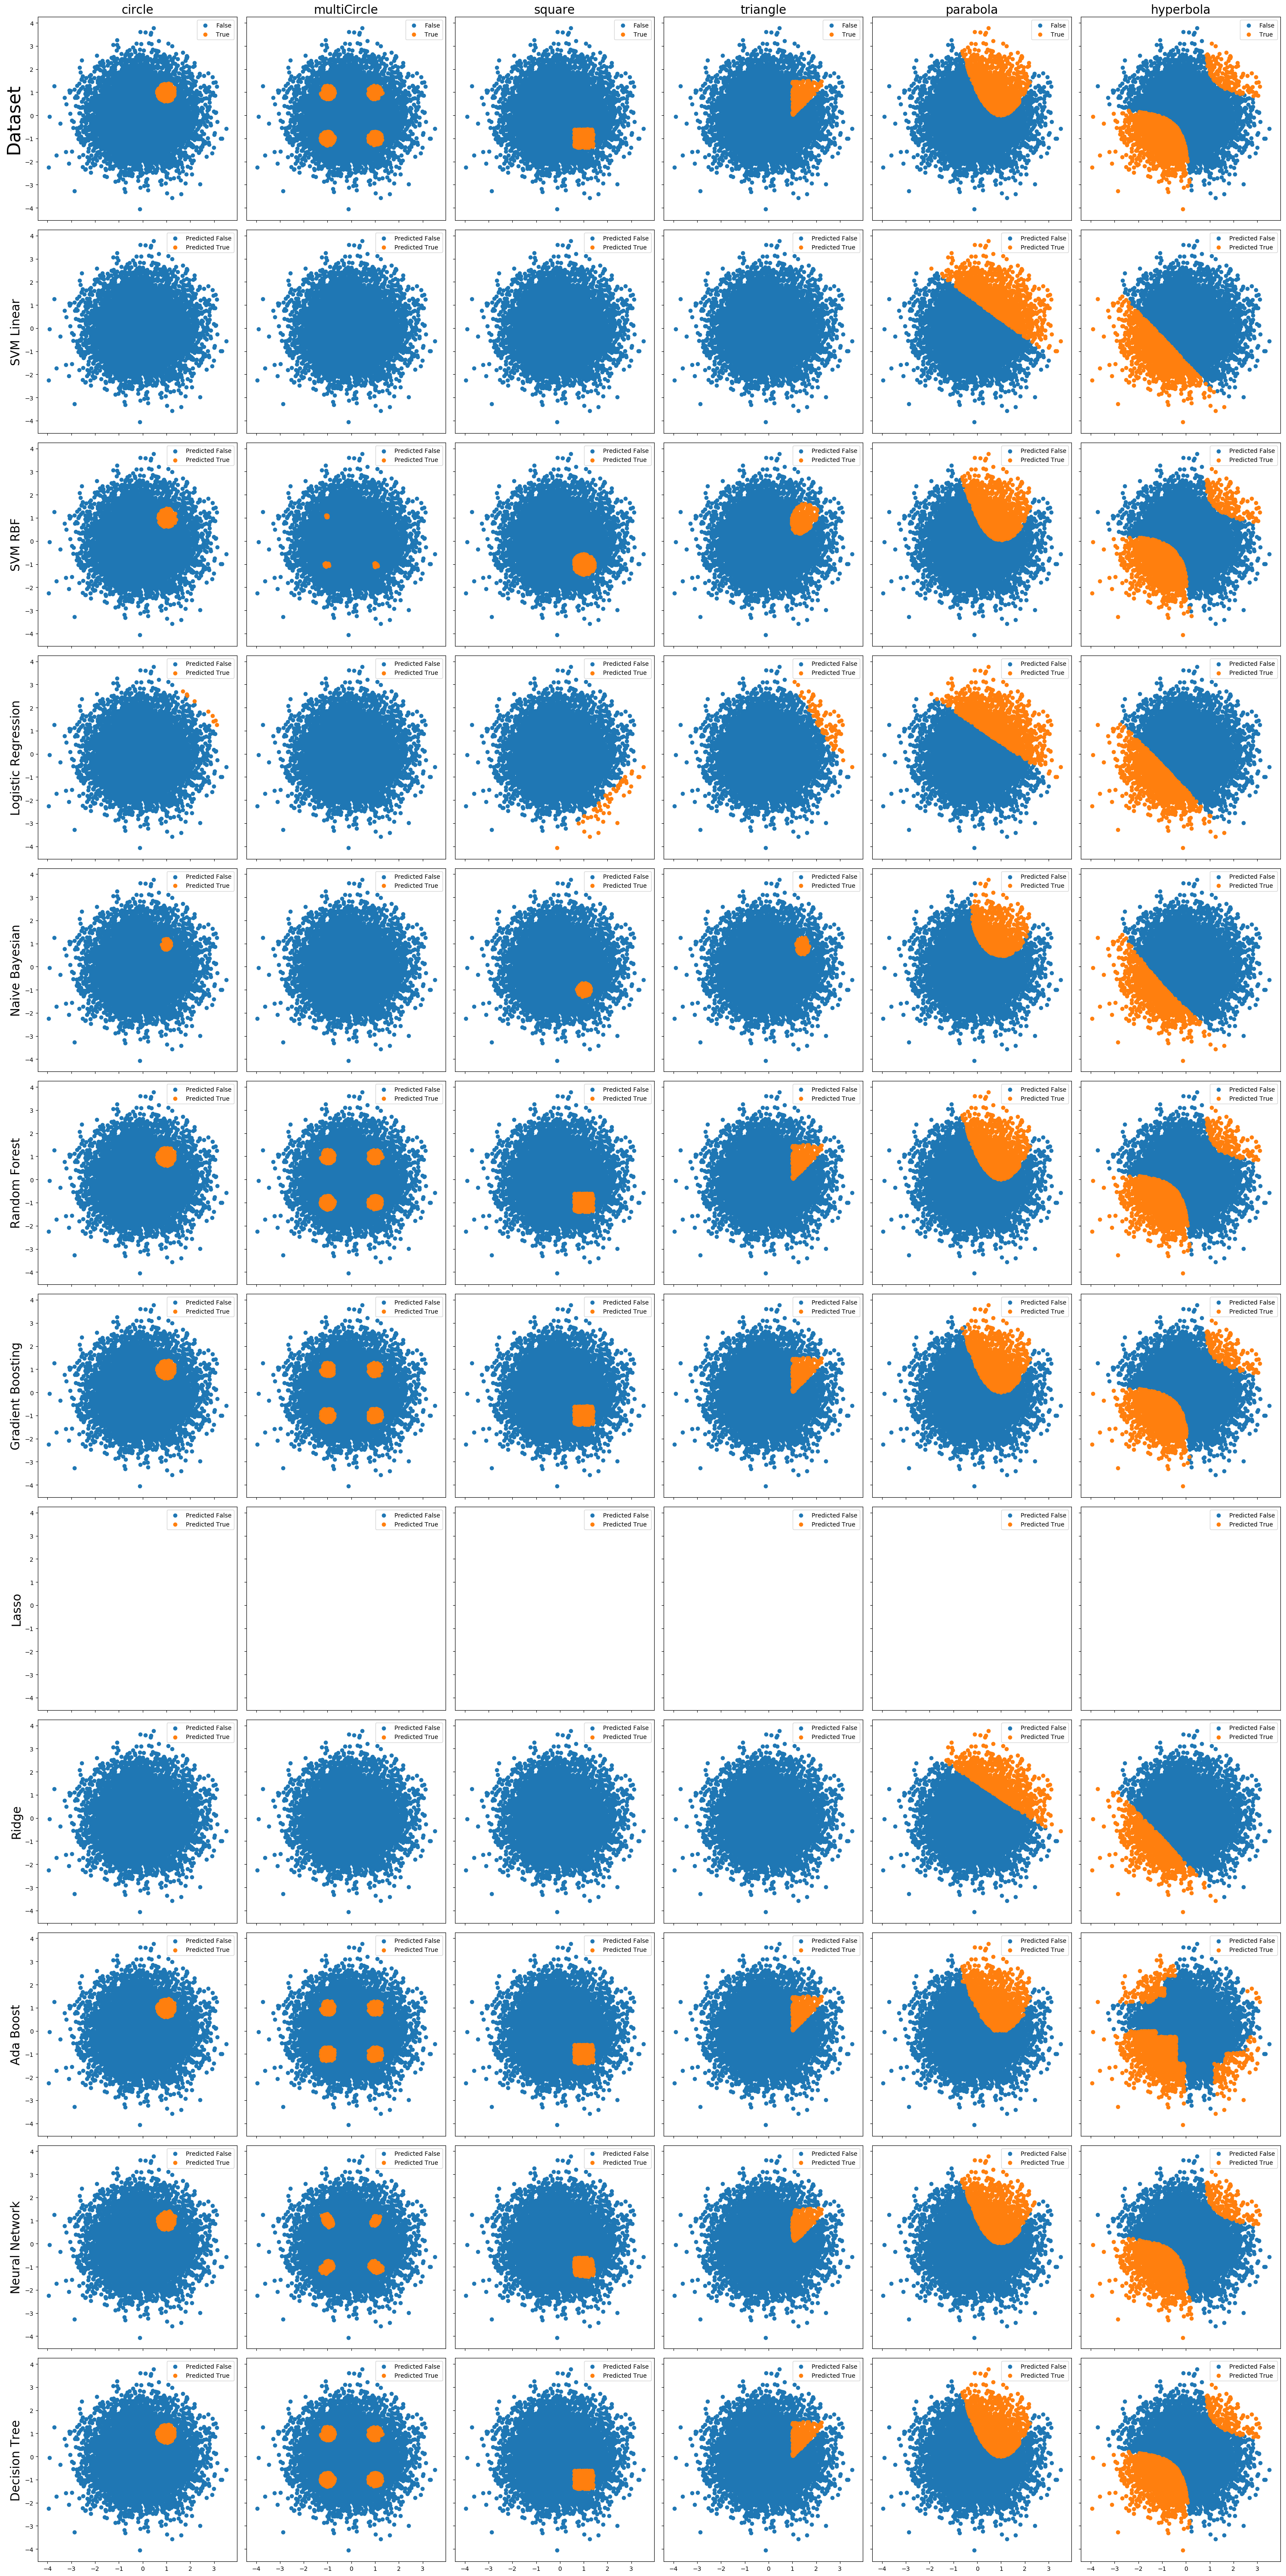

In [18]:
fig, axs = plt.subplots(len(models)+1, df.shape[1]-2, figsize=(5*(df.shape[1]-2) , 5*(len(models)+1)) , sharex=True, sharey=True)
#fig, axs = plt.subplots(len(models)+1, 2, figsize=(10, 50))
numcols = df.shape[1] - 2 
axs[0, 0].set_ylabel('Dataset', fontsize=30)
for i in np.arange(numcols):
    y = df.iloc[:,i+2]
    colname = df.columns[i+2]
    axs[0, i].scatter(df.loc[y==0]['x'], df.loc[y==0]['y'], label='False')
    axs[0, i].scatter(df.loc[y==1]['x'], df.loc[y==1]['y'], label='True')
    axs[0, i].legend() 
    axs[0, i].set_title(colname, fontsize=20)
    
    for j in np.arange(len(models)):
        model = models[j].fit(X, y)
        df['predict'] = model.predict(X)
        df['correct'] = [1 if x==y1 else 0 for x, y1 in zip(df['predict'], df[colname])]
        #axs[j+1, i].scatter(df.loc[df['correct']==0]['x'], df.loc[df['correct']==0]['y'], label='Incorrectly Classifed')
        #axs[j+1, i].scatter(df.loc[df['correct']==1]['x'], df.loc[df['correct']==1]['y'], label='Correctly Classifed')
        axs[j+1, i].scatter(df.loc[df['predict']==0]['x'], df.loc[df['predict']==0]['y'], label='Predicted False')
        axs[j+1, i].scatter(df.loc[df['predict']==1]['x'], df.loc[df['predict']==1]['y'], label='Predicted True')
        axs[j+1, i].legend()
        if(i==0):
            axs[j+1, i].set_ylabel(modelNames[j], fontsize=20)
fig.tight_layout()
